# Градиентный спуск для минимизации линейной регрессии
Будем рассматривать случай парной регрессии, то есть моделью будет являться $a(x) = w_1 \cdot x + w_0$, где x - это единственный признак.

Для начала сгенерируем случайную выборку.

In [311]:
import torch

count = 50
x = torch.rand(count, 2)

k = 0.1
iterations = 1

print(x)

tensor([[0.1188, 0.9286],
        [0.5047, 0.9006],
        [0.3612, 0.5283],
        [0.2612, 0.5227],
        [0.3587, 0.7516],
        [0.7769, 0.8460],
        [0.1587, 0.8473],
        [0.5381, 0.1085],
        [0.2418, 0.0889],
        [0.1968, 0.3482],
        [0.8098, 0.0803],
        [0.6916, 0.6033],
        [0.7033, 0.9507],
        [0.8696, 0.1349],
        [0.8736, 0.5541],
        [0.7198, 0.3086],
        [0.7436, 0.5641],
        [0.5905, 0.4592],
        [0.3978, 0.3041],
        [0.7075, 0.1043],
        [0.1345, 0.2760],
        [0.4937, 0.1910],
        [0.5310, 0.9920],
        [0.7387, 0.4192],
        [0.2681, 0.4354],
        [0.8676, 0.1359],
        [0.9960, 0.8961],
        [0.1550, 0.1343],
        [0.3354, 0.7186],
        [0.3556, 0.6279],
        [0.1193, 0.6331],
        [0.4337, 0.9715],
        [0.7322, 0.2243],
        [0.6130, 0.1154],
        [0.2839, 0.3832],
        [0.6131, 0.0141],
        [0.1785, 0.6708],
        [0.4967, 0.1852],
        [0.7

В качестве функции потерь будем использовать функционал усредненной квадратичной разности.

In [312]:
from torch.autograd import Variable

def getQ(w, count, x):
    Q = 0
    for i in range(count):
        Q += (w[0][1] * x[i][0] + w[0][0] - x[i][1]) ** 2
    Q *= (1 / count)
    return Q

w = Variable(torch.ones(1, 2), requires_grad=True)

Q = getQ(w, count, x)
Q.backward(retain_graph=True)

In [313]:
import matplotlib.pyplot as plt

def show_line(w, x):
    x_axis = []
    y_axis = []
    
    plt.xlabel('Значение параметра')
    plt.ylabel('Значение величины')

    for i in range(count):
        x_axis += [x[i][0]]
        y_axis += [x[i][1]]
    plt.plot(x_axis, y_axis, 'ro')
    plt.axis([-1, 1, -1, 1])

    plt.plot([-1, 1], [w[0][1] * -1 + w[0][0], w[0][1] * 1 + w[0][0]])
    plt.show()

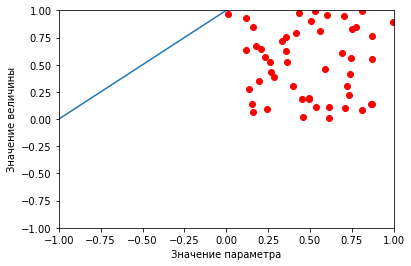

In [314]:
show_line(w, x)

Произведем серию из $10000$ итераций градиентного спуска.

In [315]:
for i in range(10000):
    w.data -= w.grad * (k / iterations)
    iterations += 1

    Q = getQ(w, count, x)
    Q.backward(retain_graph=True)

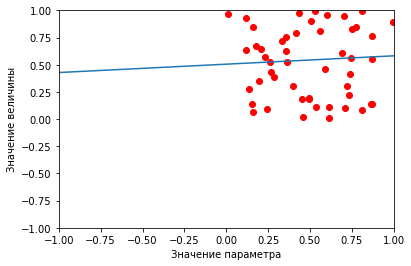

In [316]:
show_line(w, x)